In [1]:
import re
import numpy as np
import os

FILENAME = 'input.txt'

with open(FILENAME) as f:
    lines = f.readlines()
    
line_regex = re.compile(r'p=(-?\d+),(-?\d+) v=(-?\d+),(-?\d+)')
input = [[int(x) for x in line_regex.match(line).groups()] for line in lines]
vectors = np.array(input)

X_MAX = 101 if FILENAME == 'input.txt' else 11
Y_MAX = 103 if FILENAME == 'input.txt' else 7

# Part 1

In [2]:
pos = vectors[:, :2] + 100 * vectors[:, 2:]
pos[:, 0] %= X_MAX
pos[:, 1] %= Y_MAX

first_quadrant = (pos[:, 0] > X_MAX // 2) & (pos[:, 1] < Y_MAX // 2)
second_quadrant = (pos[:, 0] < X_MAX // 2) & (pos[:, 1] < Y_MAX // 2)
third_quadrant = (pos[:, 0] < X_MAX // 2) & (pos[:, 1] > Y_MAX // 2)
fourth_quadrant = (pos[:, 0] > X_MAX // 2) & (pos[:, 1] > Y_MAX // 2)

print(first_quadrant.sum() * second_quadrant.sum() * third_quadrant.sum() * fourth_quadrant.sum())

223020000


# Part 2

Just look trough the `tree_frames` folder and find the christmas tree.

frame_7338.png


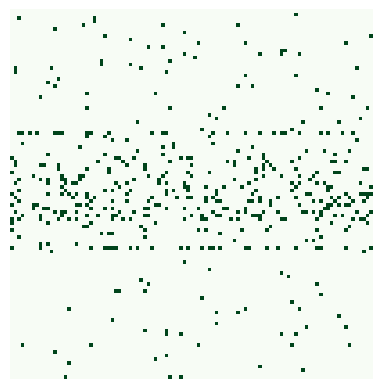

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
OFFSET = 0

def show_grid(pos, save_name=None):
    grid = np.zeros((Y_MAX, X_MAX), dtype=int)
    for x, y in pos:
        grid[y, x] = 1
    plt.set_cmap('Greens')
    plt.axis('off')
    plt.imshow(grid)
    if save_name:
        plt.savefig(save_name, dpi=70)
    else:
        plt.show()
    
pos = vectors[:, :2] + OFFSET * vectors[:, 2:]

VAR_X_THRESHOLD = 500

try:
    os.mkdir('tree_frames')
except FileExistsError:
    for f in os.listdir('tree_frames'):
        os.remove(f'tree_frames/{f}')

for i in range(1, 10000):
    pos += vectors[:, 2:]
    pos[:, 0] %= X_MAX
    pos[:, 1] %= Y_MAX
    var_x = pos[:, 1].var()
    if var_x < VAR_X_THRESHOLD:
        show_grid(pos, f'tree_frames/frame_{i+OFFSET:04}.png')

# Find the tree frame by looking at the smallest file size. The smallest png will have the least noise and be the tree.
file_sizes = {}    
for f in os.listdir('tree_frames'):
    file_sizes[f] = os.path.getsize(f'tree_frames/{f}')
smallest_file = min(file_sizes, key=file_sizes.get)
im = Image.open(f'tree_frames/{smallest_file}')
im.show()
print(smallest_file)